In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Framingham.csv')

In [3]:
print('Our dataset has',df.shape[0],'rows and',df.shape[1],'columns')

Our dataset has 4240 rows and 16 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB



The dataset is a relatively small subset of the broader FHS dataset and comprises 4240 observations along with 16 variables. These variables can be described as follows:






**Gender** : binary variable is denoted as "male" in the dataset, representing the gender of the individuals.

**Age** : Indicates the age of the individuals at the time of their medical examination, measured in years.

**Education** : This is a categorical variable that reflects the participants' educational levels, categorized into the following levels:

Some high school (1)
High school/GED (2)
Some college/vocational school (3)
College (4)

**CurrentSmoker** : This variable indicates whether the individual was a current cigarette smoker at the time of the examination.

**CigsPerDay** : Represents the number of cigarettes smoked by each individual per day.

**BPmeds** : Denotes the use of anti-hypertensive medication during the examination.

**PrevalentStroke** : A binary variable, with 0 indicating the absence of a prevalent stroke (free of the disease).

**PrevalentHyp** : This binary variable defines whether the subject was considered hypertensive, especially if they were under treatment.

**Diabetes** : Indicates whether the individual met the criteria for being diabetic based on the first examination and whether they were treated for it.

**TotChol**: Represents the total cholesterol level in milligrams per deciliter (mg/dL).

**SysBP** : Stands for systolic blood pressure, measured in millimeters of mercury (mmHg).

**DiaBP** : Represents diastolic blood pressure, also measured in millimeters of mercury (mmHg).

**BMI**:Refers to the Body Mass Index, calculated as weight in kilograms (kg) divided by the square of height in meters (m^2).

**HeartRate** Indicates the heart rate in beats per minute.

**Glucose** :Represents the blood glucose level in milligrams per deciliter (mg/dL)

**TenYearCHD** :This variable pertains to the 10-year risk of coronary heart disease (CHD).






In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Lets look at descriptive statistics of the variables of the study

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [7]:
print(df['TenYearCHD'].value_counts())
print((df['TenYearCHD'].value_counts()/df.shape[0])*100)

0    3596
1     644
Name: TenYearCHD, dtype: int64
0    84.811321
1    15.188679
Name: TenYearCHD, dtype: float64


Our dataset is imbalanced with more samples of people with no chance of 10-year risk of coronary heart disease (CHD). Almost 84% of sample are with no chance of heart disease.

<Axes: >

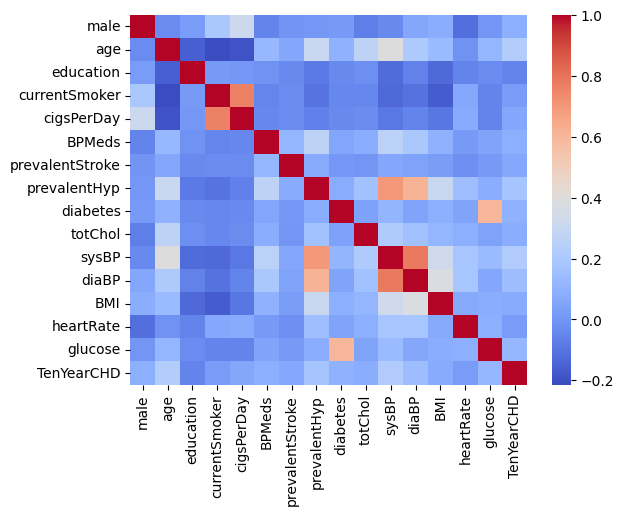

In [29]:
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm')

### **Missing values**

Lets dwell into the education column and check the missing values.

In [9]:
df[df['education'].isnull()].head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
72,0,37,NaN,0,0.0,0.0,0,0,0,200.0,119.0,79.0,33.29,67.0,87.0,0
184,1,67,NaN,0,0.0,0.0,0,0,0,257.0,125.0,67.5,25.95,65.0,69.0,0
213,0,34,NaN,0,0.0,0.0,0,0,0,163.0,107.0,71.0,23.88,73.0,80.0,0


We have observed that the age of samples with missing education are on the higher side. It could mean that the people might have not received education or have no access to their education qualification. we will choose to see the mean of age and what are the distribution of education qualifications.

In [10]:
df['age'][df['education'].isnull()].mean()

50.67619047619048

In [11]:
df['education'].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [12]:
df['education'][df['age']>=50].value_counts()

1.0    1023
2.0     456
3.0     296
4.0     192
Name: education, dtype: int64

People with higher age have received High school or equivalent level of education. we will move ahead with imputing 1 on missing values

**Column : CigsPerDay**



Let's check the CigsPerDay column missing values in details and thier distribution.

In [13]:
df[df['cigsPerDay'].isnull()].head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
131,1,43,4.0,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0
139,1,49,4.0,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1
1046,0,49,1.0,1,NaN,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.0,0
1292,1,42,3.0,1,NaN,0.0,0,0,0,225.0,122.5,80.0,25.54,90.0,90.0,0
1347,0,58,4.0,1,NaN,0.0,0,1,0,270.0,195.0,117.5,23.35,75.0,NaN,0


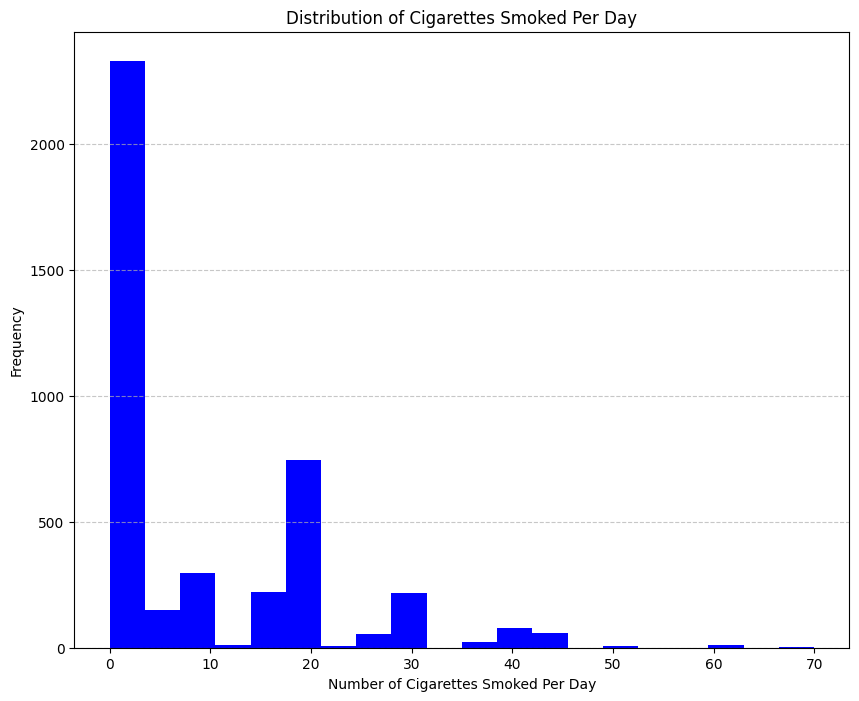

In [14]:
plt.figure(figsize=(10, 8))
plt.hist(df['cigsPerDay'], bins=20, color='blue')

# Add labels and a title
plt.xlabel('Number of Cigarettes Smoked Per Day')
plt.ylabel('Frequency')
plt.title('Distribution of Cigarettes Smoked Per Day')

# Customize the grid and add a grid line
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Maximum people are smoking between 0 to 5 cigratess per day. We will use random distribution to fill values between these two.

Column : BPMeds

In [15]:
df[df['BPMeds'].isnull()].head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
49,1,36,3.0,1,20.0,NaN,0,1,0,194.0,139.0,93.0,24.33,80.0,62.0,0
77,0,44,3.0,1,20.0,NaN,0,0,0,213.0,115.0,72.5,21.16,80.0,89.0,0
193,1,45,3.0,1,40.0,NaN,0,0,0,278.0,135.0,84.0,23.79,75.0,79.0,1
245,1,46,1.0,1,30.0,NaN,0,1,0,253.0,147.0,85.0,30.62,100.0,75.0,0
314,0,39,2.0,0,0.0,NaN,0,0,0,242.0,113.0,85.0,25.54,85.0,104.0,0


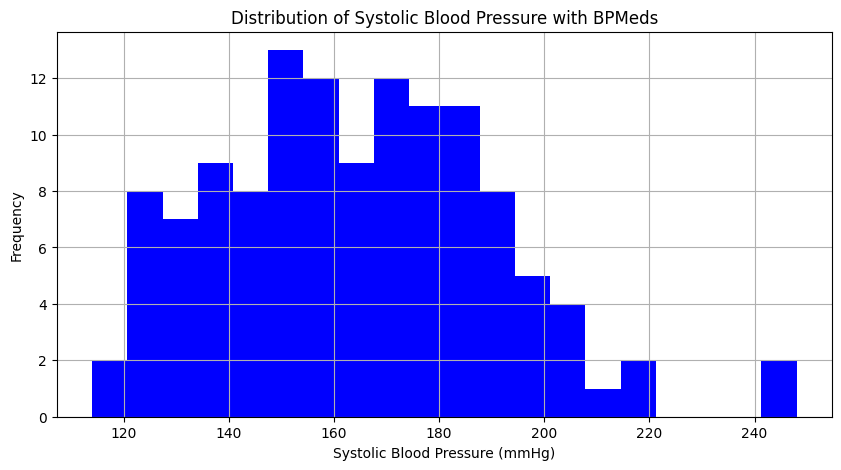

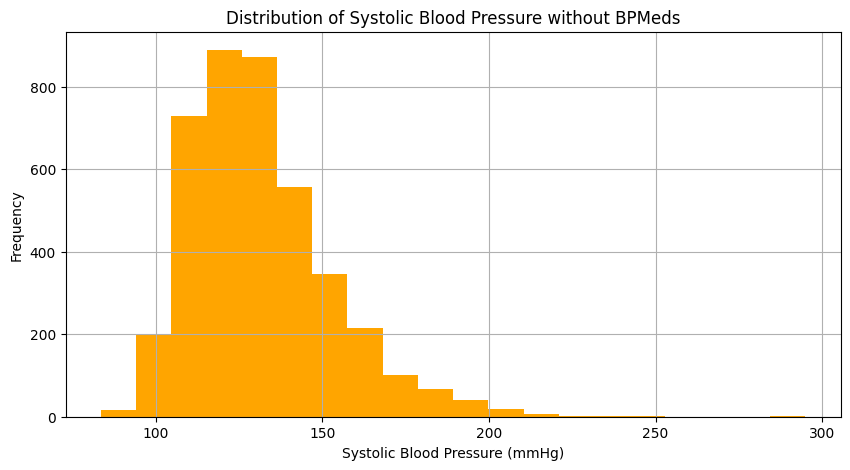

In [16]:
sysBP_with_BPMeds = df['sysBP'][df['BPMeds'] == 1]
sysBP_without_BPMeds = df['sysBP'][df['BPMeds'] == 0]

plt.figure(figsize=(10, 5))
plt.hist(sysBP_with_BPMeds, bins=20, color='blue')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.title('Distribution of Systolic Blood Pressure with BPMeds')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(sysBP_without_BPMeds, bins=20, color='orange')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.title('Distribution of Systolic Blood Pressure without BPMeds')
plt.grid(True)
plt.show()


Our observation indicates that individuals with systolic blood pressure (pressure) exceeding 140 mmHg are using medication. Systolic blood pressure levels exceeding 140 mmHg are categorized as high, and medical professionals typically advise medication to manage and reduce these elevated levels.

Column : glucose




In [17]:
df[df['glucose'].isnull()].head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
42,0,52,1.0,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
54,0,39,2.0,1,20.0,0.0,0,0,0,209.0,115.0,75.0,22.54,90.0,NaN,0


In [18]:
df['diabetes'][df['glucose']>=1].value_counts()

0    3747
1     105
Name: diabetes, dtype: int64

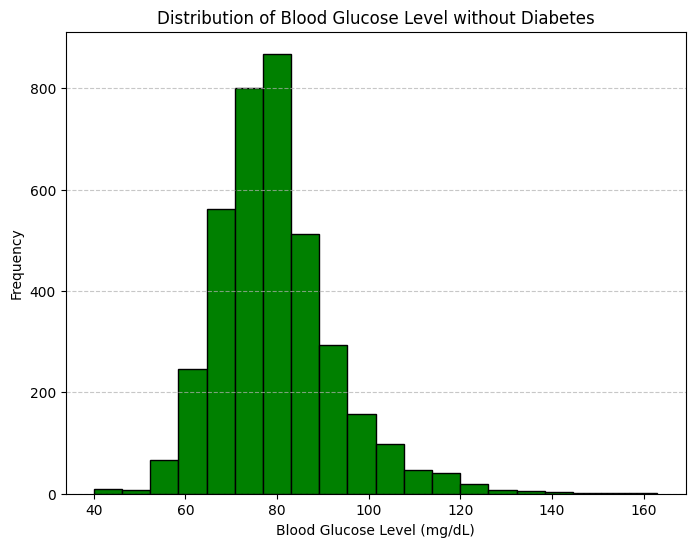

In [19]:
glucose_no_diabetes = df['glucose'][df['diabetes'] == 0]
plt.figure(figsize=(8, 6))
plt.hist(glucose_no_diabetes, bins=20, color='green', edgecolor='black')
plt.xlabel('Blood Glucose Level (mg/dL)')
plt.ylabel('Frequency')
plt.title('Distribution of Blood Glucose Level without Diabetes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Given that a significant portion of the samples in our dataset is from individuals without diabetes, it is reasonable to expect that their glucose levels will typically fall within the normal range. Therefore, we can impute values in the range of 70 to 90 mg/dL to represent these glucose levels. This approach allows us to maintain a realistic distribution of glucose values for non-diabetic individuals in the dataset.






Column : totChol

In [20]:
print('The Average age is',df['age'][df['totChol'].isnull()].mean())

display(df[df['totChol'].isnull()].head(5))

The Average age is 51.48


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
42,0,52,1.0,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
154,0,38,3.0,1,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0
247,0,40,2.0,1,20.0,0.0,0,0,1,NaN,114.0,65.0,21.19,61.0,NaN,1
429,1,65,NaN,0,0.0,0.0,0,0,0,NaN,152.5,97.5,28.35,65.0,73.0,0
567,0,66,2.0,1,15.0,0.0,0,1,0,NaN,188.0,108.5,20.49,90.0,NaN,0


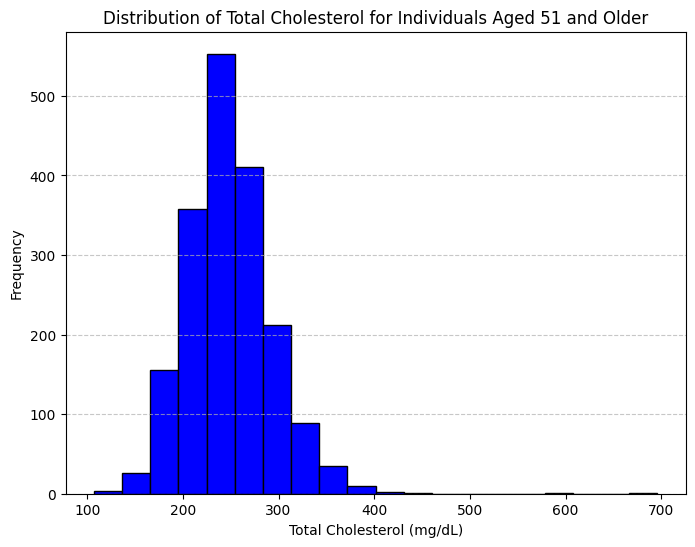

In [21]:
filtered_data = df[df['age'] >= 51]

plt.figure(figsize=(8, 6))
plt.hist(filtered_data['totChol'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Cholesterol for Individuals Aged 51 and Older')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Based on the observed distribution, it is evident that the data points are closely clustered, indicating a high degree of central tendency. Given this characteristic, imputing the mode (the most frequently occurring value) for the missing values is a suitable approach. This imputation method aligns with the central tendency of the data and helps maintain the existing distribution pattern.






In [22]:
df[df['BMI'].isnull()].head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
97,0,40,2.0,0,0.0,0.0,0,0,0,205.0,100.0,60.0,NaN,60.0,72.0,1
294,0,47,1.0,1,25.0,0.0,0,1,1,258.0,195.0,90.0,NaN,86.0,NaN,1
705,0,45,3.0,0,0.0,0.0,0,0,0,231.0,107.5,57.5,NaN,81.0,NaN,0
1155,0,64,2.0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1161,0,47,2.0,0,0.0,0.0,0,0,0,195.0,126.0,75.0,NaN,60.0,NaN,1


Imputing missing values for BMI is a challenging task since it relies on weight and height, which we lack. Random imputation is not a viable solution, so we have to remove these rows.

# Imputing missing values

In [23]:
df['education'].fillna(np.random.randint(1, 5), inplace=True)

In [24]:
df['cigsPerDay'].fillna(np.random.randint(1, 5), inplace=True)

In [57]:
df['BPMeds'][df['sysBP'].astype('int32')<=40].fillna(0.0 ,inplace=True)

In [62]:
def fill_bp_meds(row):
    if pd.isna(row['BPMeds']) and row['sysBP'] <= 140:
        return 0.0
    else:
        return 1

df['BPMeds'] = df.apply(fill_bp_meds, axis=1)


In [58]:
df['BPMeds'][df['sysBP'].astype('int32')>140].fillna(1 ,inplace=True)

In [27]:
df['glucose'].fillna(np.random.randint(70,90),inplace=True)

In [68]:
df['totChol'].fillna(df['totChol'].mode,inplace=True)

In [70]:
df['heartRate'].fillna(df['heartRate'].mean,inplace=True)

In [77]:
df.dropna(subset=['BMI'], axis=-0, inplace=True)


In [78]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

We do not have any null values now. We will move forward with aggragating data.

# Data Aggregation

In [82]:
aggregated_data_1_count = df.groupby('education')['currentSmoker'].count()
aggregated_data_1_count

education
1.0    1713
2.0    1246
3.0     791
4.0     471
Name: currentSmoker, dtype: int64

In [85]:
aggregated_data_1_mean = df.groupby('education')['currentSmoker'].mean()
aggregated_data_1_mean

education
1.0    0.468184
2.0    0.543339
3.0    0.467762
4.0    0.507431
Name: currentSmoker, dtype: float64

From our data aggregation, we can discern that individuals with primary education have the highest number of smokers. However, among those with secondary education, there is a greater number of individuals who smoke, and these individuals tend to consume a higher number of cigarettes per day. This observation indicates a potentially noteworthy trend: while primary education may have more smokers in absolute terms, secondary education appears to have a higher per capita cigarette consumption among its smoking population.

In [87]:
aggregated_data_2_count = df.groupby('male')['cigsPerDay'].count()
aggregated_data_2_count

male
0    2406
1    1815
Name: cigsPerDay, dtype: int64

In [88]:
aggregated_data_2_mean = df.groupby('male')['cigsPerDay'].mean()
aggregated_data_2_mean

male
0     5.740233
1    13.289256
Name: cigsPerDay, dtype: float64

Our analysis reveals that females exhibit a greater propensity for smoking habits. However, it is noteworthy that among smokers, males consume more than double the number of cigarettes compared to females. This suggests a significant difference in smoking intensity between genders, with males having a notably higher rate of cigarette consumption.

In [105]:
table_1 = pd.pivot_table(df, values=['sysBP','BPMeds'] ,index=['male', 'education'],
                       aggfunc={'sysBP':'mean','BPMeds':'count'})
table_1

BPMeds       sysBP
male education                    
0    1.0           938  137.363539
     2.0           758  132.084433
     3.0           514  128.599222
     4.0           196  127.701531
1    1.0           775  133.725161
     2.0           488  128.978484
     3.0           277  132.050542
     4.0           275  128.512727

Our examination of the data indicates a noteworthy trend: among females with the lowest level of education, there is a higher prevalence of individuals taking blood pressure medication (BP medicines). Additionally, this group of females exhibits the highest average blood pressure (BP) levels.

Remarkably, we observe a parallel trend among males, where those with the lowest education level also have a higher percentage of individuals using BP medicines, and they display the highest average blood pressure values.



In [104]:
table_2 = pd.pivot_table(df, values=['TenYearCHD'] ,index=['male', 'education'],
                       aggfunc={'TenYearCHD':'count'})
table_2

TenYearCHD
male education            
0    1.0               938
     2.0               758
     3.0               514
     4.0               196
1    1.0               775
     2.0               488
     3.0               277
     4.0               275

The study reveals that females with a primary level of education are more susceptible to heart disease. This finding underscores the potential impact of education levels on the risk of heart disease among female participants. It suggests that individuals with a primary education background may face a higher risk of developing heart disease based on the study's observations.






# Visualizations

1. Whats is the age distrubution of Male and Female in our dataset?

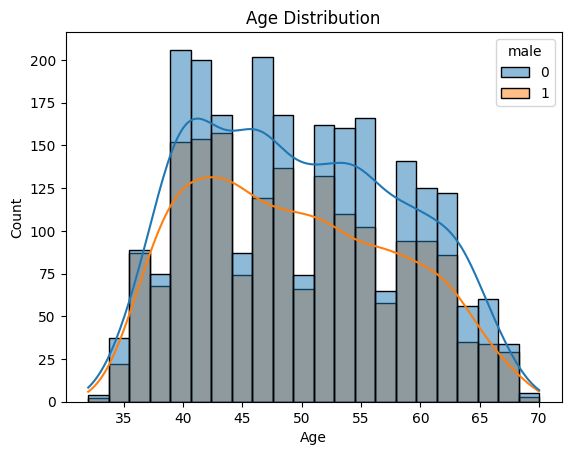

In [112]:
sns.histplot(x = df['age'], color ='blue', hue=df['male'],kde=True)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

Across all age groups, a higher number of samples are from males than females.


2. Between male and female which group is more diabetic?

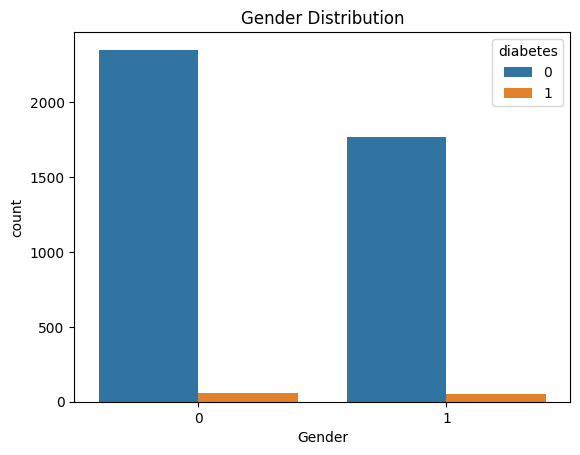

In [119]:
sns.countplot(data=df, x='male',hue=df['diabetes'])
plt.xlabel('Gender')
plt.title('Gender Distribution')
plt.show()


From the above bar chart it is clear that the Diabetes in more observed in Female than Male.

3. Does age and education are two most important factor in deciding the heard condition?

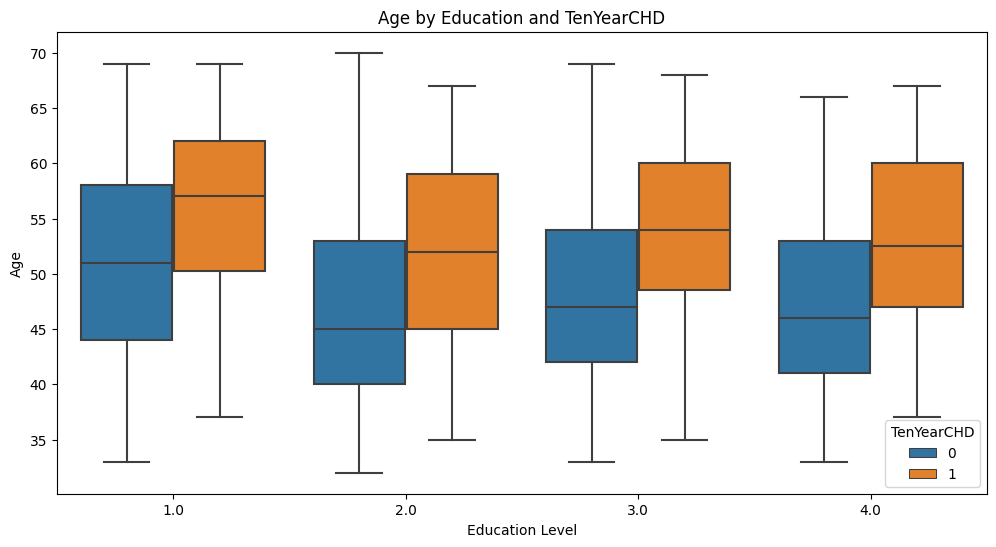

In [120]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='education', y='age', hue='TenYearCHD')
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.title('Age by Education and TenYearCHD')
plt.show()


The boxplot is illustrating the distribution of age based on eduation. It is clear that people with high age and primary level of education where the most suseptible for heart disease.

4. Is there linear relatiomship between BMI and SysBP?

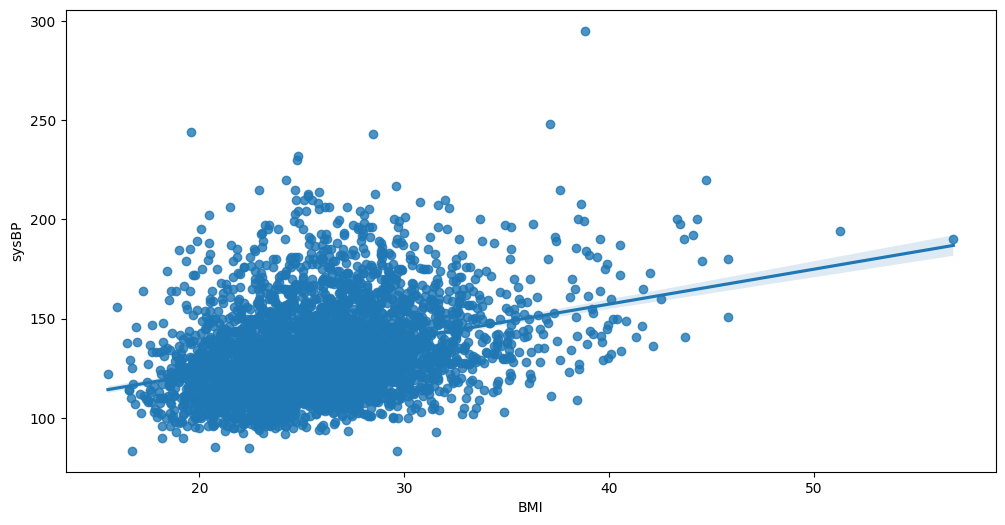

In [122]:
plt.figure(figsize=(12, 6))
sns.regplot(x = "BMI",
            y = "sysBP",
            data = df)

# show the plot
plt.show()

Due to overlapping datapoints we cannot properly observe that if the BMI and sysBP have linear relationship. But at small values they shows correlation with each other.

5. How is gender distributed with respect to TenYear heart disorder?

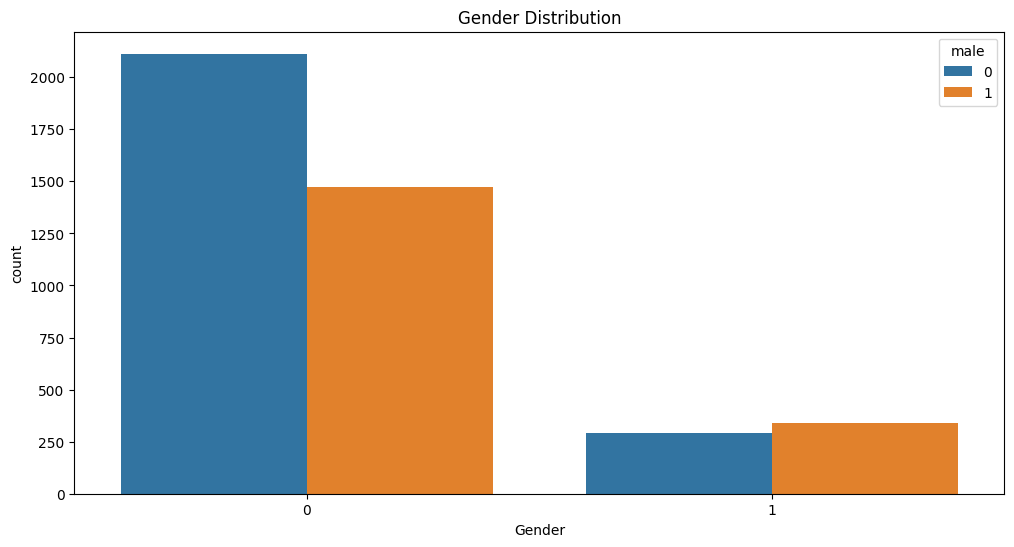

In [124]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='TenYearCHD',hue=df['male'])
plt.xlabel('Gender')
plt.title('Gender Distribution')
plt.show()

From above figure it is clear than male are more prone to health condition may be due to high smoking habits, higher BMI etc.

# References :


https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6316192/#:~:text=We%20found%20a%20gradient%20of,of%20other%20clinical%20risk%20factors.